In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
sprocket_central = pd.ExcelFile('/Users/zhenliu15471/code/zliu15471/KPMG/raw_data/KPMG_VI_New_raw_data_update_final.xlsx')

df_tra = pd.read_excel(sprocket_central, 'Transactions', header=1)

df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)

df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)

df_add = pd.read_excel(sprocket_central, 'CustomerAddress', header=1)

/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_83225/2636081817.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)
/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_83225/2636081817.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)


In [3]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
df_newc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


# Data Exploration 

## new customers 

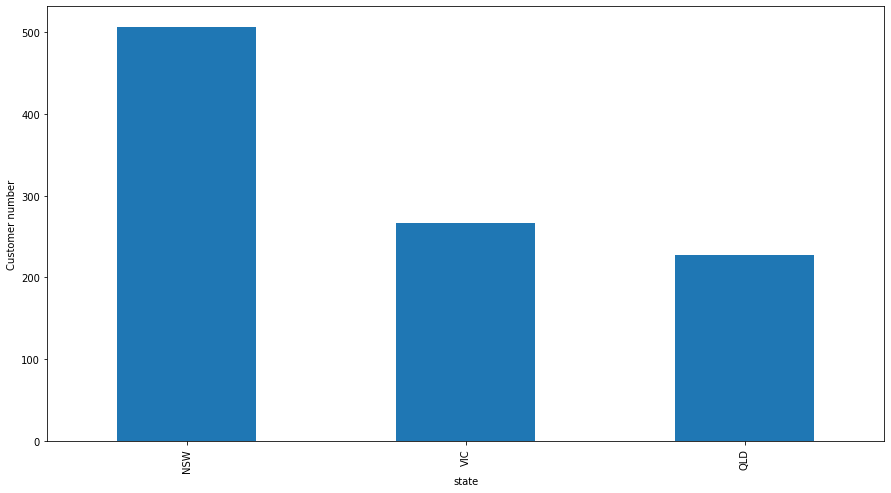

In [7]:
plt.figure(figsize=(15,8))
ax = df_newc.state.value_counts().plot.bar()
ax.set_xlabel("state")
ax.set_ylabel("Customer number");

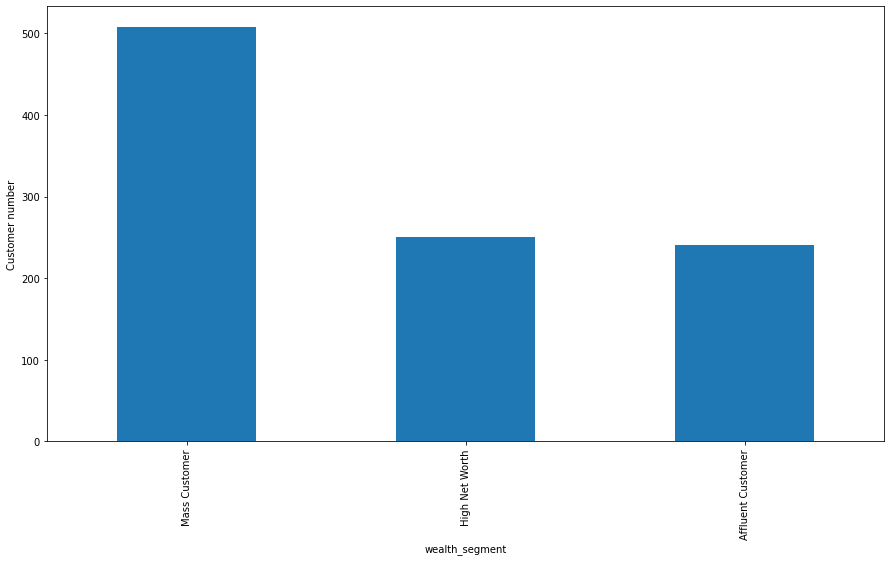

In [8]:
plt.figure(figsize=(15,8))
ax = df_newc.wealth_segment.value_counts().plot.bar()
ax.set_xlabel("wealth_segment")
ax.set_ylabel("Customer number");

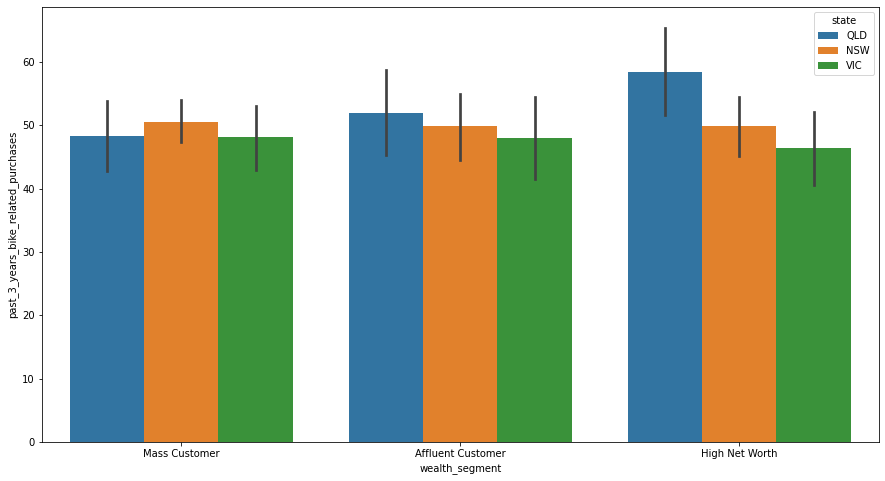

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='wealth_segment', y = 'past_3_years_bike_related_purchases',hue = 'state' );

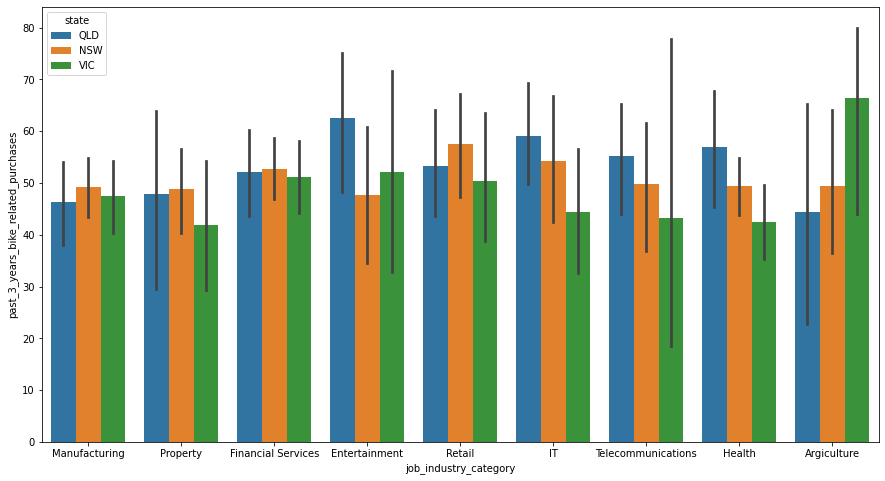

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='job_industry_category', y = 'past_3_years_bike_related_purchases',hue ='state' );

## Transactions

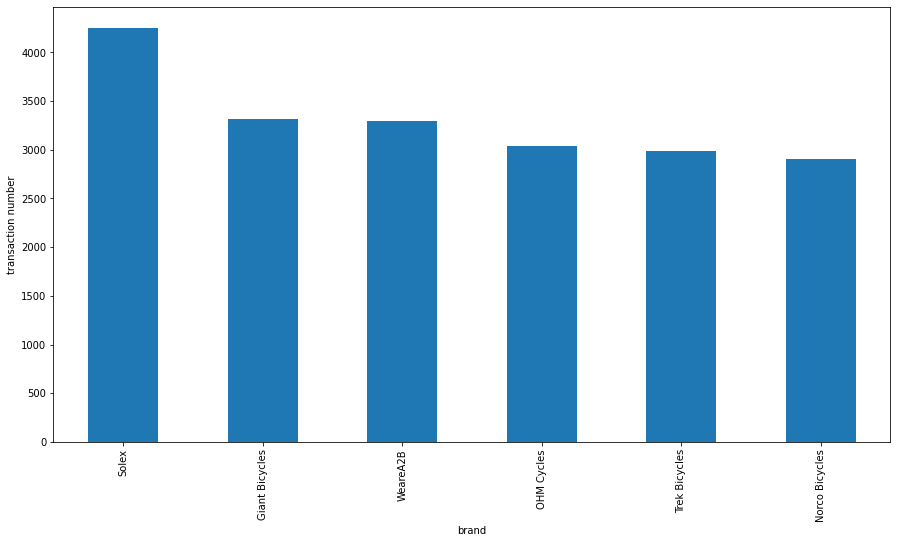

In [11]:
plt.figure(figsize=(15,8))
ax = df_tra.brand.value_counts().plot.bar();
ax.set_xlabel("brand")
ax.set_ylabel("transaction number");

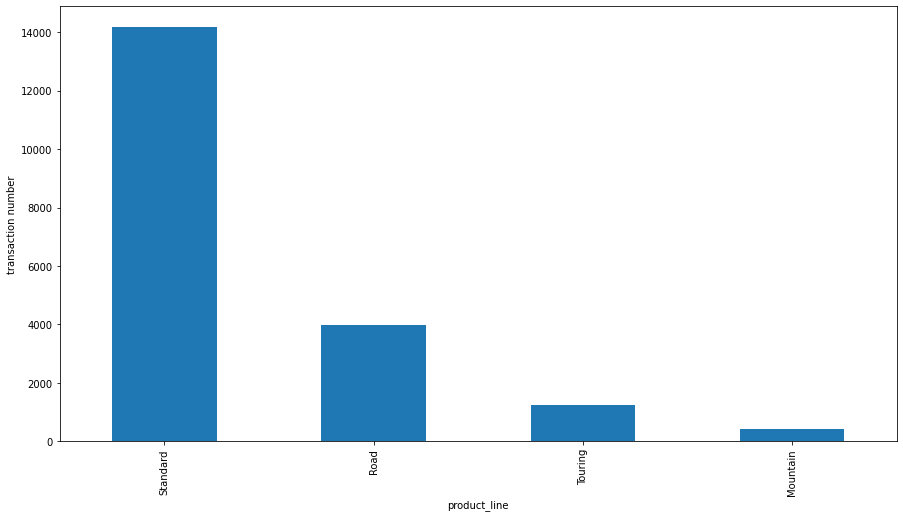

In [12]:
plt.figure(figsize=(15,8))
ax = df_tra.product_line.value_counts().plot.bar();
ax.set_xlabel("product_line")
ax.set_ylabel("transaction number");

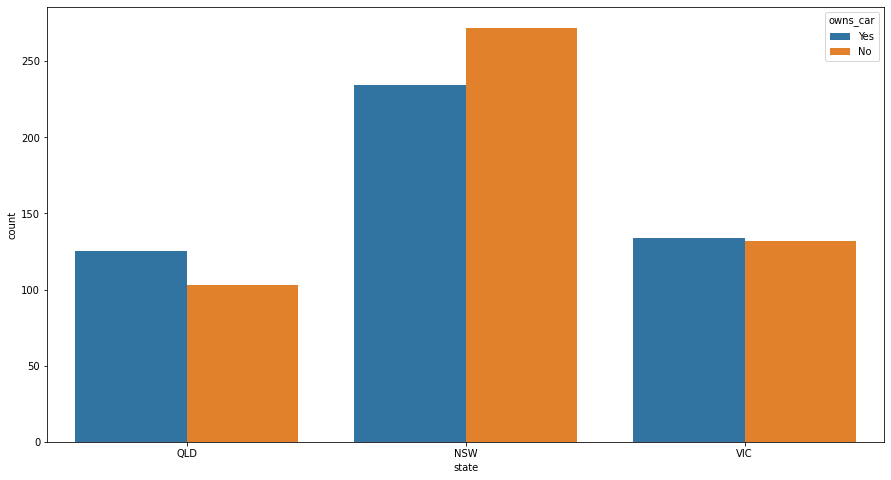

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(data = df_newc, x ='state', hue ='owns_car' );

# Feature Engineering

## drop less important features

In [14]:
df_demo.drop(['first_name','last_name','default','job_title','deceased_indicator'],axis =1, inplace =True)

In [15]:
df_demo = df_demo.dropna()

In [16]:
df_add = df_add.dropna()


## replace the inconsistent features

In [17]:
df_demo['gender'].replace(['F','Femal'],'Female',inplace  =True)
df_demo['gender'].replace('M','Male', inplace = True)
df_demo['gender'].replace('U','Unknown',inplace = True)

In [18]:
df_demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0


In [19]:
df_add['state'].replace('New South Wales','NSW',inplace =True)
df_add['state'].replace('Victoria','VIC',inplace =True)

In [20]:
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Create new feature 'age' by calculating DOB

In [21]:
df_demo['age'] = (dt.datetime.now()-df_demo['DOB'])/np.timedelta64(1,'Y')

In [22]:
df_demo['age_group'] = ((round(df_demo['age'] / 10)) * 10).astype(int)

In [23]:
df_demo

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,68.948782,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,41.769580,40
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0,68.674992,70
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,60.973259,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,56.020385,60
...,...,...,...,...,...,...,...,...,...,...
3993,3994,Female,5,1989-04-07,Manufacturing,Affluent Customer,No,12.0,33.462770,30
3994,3995,Male,93,1975-12-12,Manufacturing,Mass Customer,Yes,14.0,46.782687,50
3995,3996,Female,8,1975-08-09,Health,Mass Customer,No,19.0,47.124926,50
3996,3997,Female,87,2001-07-13,Manufacturing,High Net Worth,Yes,1.0,21.196946,20


## data frame join 

In [24]:
df_dd= df_demo.merge(df_add, how = 'inner', on = 'customer_id')

In [25]:
df_dd = df_dd.dropna()

In [26]:
df_dd.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,68.948782,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,41.769580,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,60.973259,60,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,56.020385,60,9 Oakridge Court,3216,VIC,Australia,9
4,7,Female,6,1976-02-23,Financial Services,Affluent Customer,Yes,11.0,46.582820,50,4 Delaware Trail,2210,NSW,Australia,9


In [27]:
df_dd.drop('DOB',axis = 1, inplace = True)

In [28]:
df_dd.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Female,93,Health,Mass Customer,Yes,11.0,68.948782,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,41.769580,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,IT,Mass Customer,No,7.0,60.973259,60,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Male,35,Retail,High Net Worth,Yes,13.0,56.020385,60,9 Oakridge Court,3216,VIC,Australia,9
4,7,Female,6,Financial Services,Affluent Customer,Yes,11.0,46.582820,50,4 Delaware Trail,2210,NSW,Australia,9


In [29]:
df_dd.shape

(3254, 14)

# RFM method

In [30]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [31]:
df_tra = df_tra.sort_values('customer_id')

In [32]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [33]:
df_tra = df_tra.dropna(axis=1, how='all')
df_tra = df_tra.dropna()

In [34]:
df_tra.nunique()

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [35]:
df_tra['product_first_sold_date'] = pd.to_timedelta(df_tra['product_first_sold_date'], unit='D') + pd.to_datetime('1899-12-30')

In [36]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [37]:

df_tra['last_purchase_days_ago'] =  df_tra['transaction_date'].max()- df_tra['transaction_date']
df_tra['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
df_tra['profit'] = df_tra['list_price'] - df_tra['standard_cost']
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-05,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-09,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-05,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,312.0,17.87


In [38]:
df_tra.shape

(19445, 15)

In [39]:
rfm = df_tra.groupby('customer_id').agg({
    'customer_id' : lambda x:x,
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

In [40]:
rfm

,customer_id,last_purchase_days_ago,profit
customer_id,,,
1,11,7.0,3018.090000
2,3,128.0,2226.260000
3,7,102.0,3290.210000
4,2,195.0,220.570000
5,6,16.0,2394.940000
...,...,...,...
3497,3,52.0,1648.320000
3498,6,127.0,3147.330000
3499,7,51.0,4955.250000


In [41]:
rfm.rename(columns = {'customer_id': 'frequency',
                     'last_purchase_days_ago': 'recency',
                     'profit': 'monetary_value'},
          inplace =True)

In [42]:
rfm.head()

,frequency,recency,monetary_value
customer_id,,,
1,11,7.0,3018.09
2,3,128.0,2226.26
3,7,102.0,3290.21
4,2,195.0,220.57
5,6,16.0,2394.94


/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


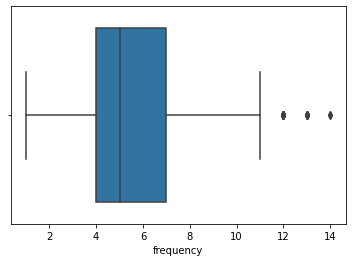

In [43]:
sns.boxplot(rfm['frequency']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


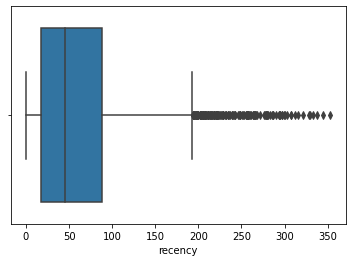

In [44]:
sns.boxplot(rfm['recency']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


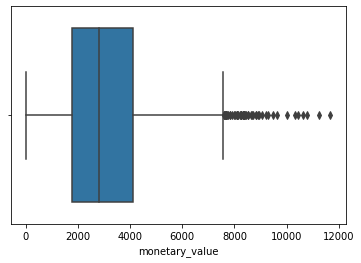

In [45]:

sns.boxplot(rfm['monetary_value']);

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
stand  = StandardScaler()

In [54]:
rfm_model = rfm.copy()

In [56]:
rfm_model['recency'] = stand.fit_transform(rfm_model[['recency']] )

rfm_model['frequency'] = stand.fit_transform(rfm_model[['frequency']] )

rfm_model['monetary_value'] = stand.fit_transform(rfm_model[['monetary_value']] )

In [57]:
rfm_model.shape

(3492, 3)

# model development (K-means Cluster)

## create elbow curve and find optimal number of clusters

In [59]:
from sklearn.cluster import KMeans


In [60]:
cluster_error = []

for num_clusters in range(1,15):
    clusters = KMeans(n_clusters=num_clusters, n_init=10)
    clusters.fit(rfm_model)
    cluster_error.append(clusters.inertia_)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_

clu_df = pd.DataFrame({'num_of_clusters': (range(1,15)), 'Cluster_errors' : cluster_error})
clu_df

,num_of_clusters,Cluster_errors
0,1,10476.000000
1,2,6232.007027
2,3,4311.476326
3,4,3493.894815
4,5,3006.248577
5,6,2660.075944
6,7,2420.175926
7,8,2198.781808
8,9,2040.249388
9,10,1894.438937


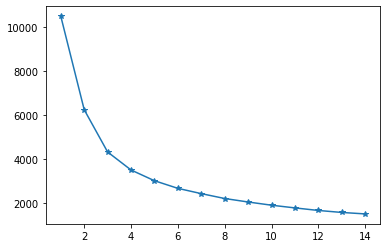

In [61]:
plt.plot(clu_df['num_of_clusters'], clu_df['Cluster_errors'], marker='*');

In [62]:
model01 = KMeans(n_clusters=5, n_init=15, random_state=2345)
model01.fit(rfm_model)

KMeans(n_clusters=5, n_init=15, random_state=2345)

In [63]:
cen = clusters.cluster_centers_

In [64]:
cen

array([[ 4.28553360e-01,  5.88375282e-01,  1.02425711e+00],
       [ 4.60104639e-01,  4.39304609e-01, -2.33120407e-01],
       [ 6.86534937e-01, -5.88018237e-01,  1.28406407e+00],
       [-1.12833791e+00,  2.27895599e-01, -1.23935294e+00],
       [-3.64514694e-01,  1.82682867e+00, -6.39011476e-02],
       [-2.38328737e-03, -6.34956410e-01, -6.11290110e-01],
       [-1.64606315e-01, -6.01324367e-01,  3.73211525e-01],
       [-9.68322623e-01, -6.72162535e-01, -7.87827835e-01],
       [ 9.39287653e-01, -6.46868256e-01,  1.08440253e-01],
       [ 1.88582168e+00, -5.30307530e-01,  1.05952824e+00],
       [-1.45858376e+00,  3.28477505e+00, -1.15845632e+00],
       [ 1.83732305e+00, -5.48581226e-01,  2.55425236e+00],
       [-1.22182122e+00,  1.55272059e+00, -1.07463282e+00],
       [-5.68407564e-01,  4.04469076e-01, -2.67010409e-01]])

In [65]:
model01.labels_

array([2, 1, 4, ..., 2, 4, 3], dtype=int32)

In [66]:
rfm_model['level'] = model01.labels_

In [67]:
rfm_model

,frequency,recency,monetary_value,level
customer_id,,,,
1,2.370808,-0.937711,-0.031053,2
2,-1.121093,1.106815,-0.483817,1
3,0.624857,0.667496,0.124543,4
4,-1.557581,2.238908,-1.630658,1
5,0.188370,-0.785639,-0.387367,0
...,...,...,...,...
3497,-1.121093,-0.177350,-0.814279,3
3498,0.188370,1.089919,0.042845,4
3499,0.624857,-0.194247,1.076603,2


In [68]:
map_dict = {0: 'Top',
           1: 'High',
           2: 'Medium',
           3 : 'Low',
           4: 'Lost'}
rfm_model['level'] = rfm_model['level'].map(map_dict)

In [69]:
rfm_model

,frequency,recency,monetary_value,level
customer_id,,,,
1,2.370808,-0.937711,-0.031053,Medium
2,-1.121093,1.106815,-0.483817,High
3,0.624857,0.667496,0.124543,Lost
4,-1.557581,2.238908,-1.630658,High
5,0.188370,-0.785639,-0.387367,Top
...,...,...,...,...
3497,-1.121093,-0.177350,-0.814279,Low
3498,0.188370,1.089919,0.042845,Lost
3499,0.624857,-0.194247,1.076603,Medium


/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


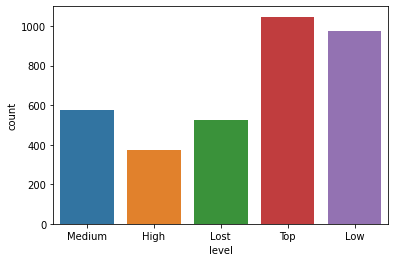

In [71]:
sns.countplot(rfm_model['level']);

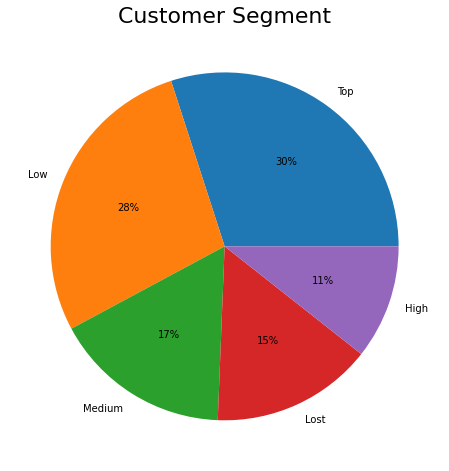

In [72]:
plt.figure(figsize=(15,8))
fig = plt.pie(rfm_model.level.value_counts(), labels=rfm_model.level.value_counts().index,autopct='%.0f%%')
plt.title('Customer Segment', fontsize=22)
plt.set_cmap('winter');


# Interpretation

In [73]:
final_df =  df_dd.merge(rfm_model, how = 'inner', on = 'customer_id')

In [74]:
final_df = final_df.dropna()

In [75]:
final_df

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation,frequency,recency,monetary_value,level
0,1,Female,93,Health,Mass Customer,Yes,11.0,68.948782,70,060 Morning Avenue,2016,NSW,Australia,10,2.370808,-0.937711,-0.031053,Medium
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,41.769580,40,6 Meadow Vale Court,2153,NSW,Australia,10,-1.121093,1.106815,-0.483817,High
2,4,Male,33,IT,Mass Customer,No,7.0,60.973259,60,0 Holy Cross Court,4211,QLD,Australia,9,-1.557581,2.238908,-1.630658,High
3,6,Male,35,Retail,High Net Worth,Yes,13.0,56.020385,60,9 Oakridge Court,3216,VIC,Australia,9,-0.248118,0.025413,0.499834,Lost
4,7,Female,6,Financial Services,Affluent Customer,Yes,11.0,46.582820,50,4 Delaware Trail,2210,NSW,Australia,9,-1.121093,3.218929,-1.630921,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,36.414233,40,2565 Caliangt Point,2171,NSW,Australia,9,-0.684606,3.269620,-0.586980,High
2847,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,36.392330,40,96 Delladonna Trail,3976,VIC,Australia,5,-1.121093,-0.177350,-0.814279,Low
2848,3498,Female,28,Manufacturing,Mass Customer,No,5.0,26.891793,30,3 Nova Point,3012,VIC,Australia,4,0.188370,1.089919,0.042845,Lost
2849,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,43.269953,40,310 Stephen Terrace,4073,QLD,Australia,9,0.624857,-0.194247,1.076603,Medium


In [76]:
target_cus = final_df[final_df['level'].isin(['Top','High'])]

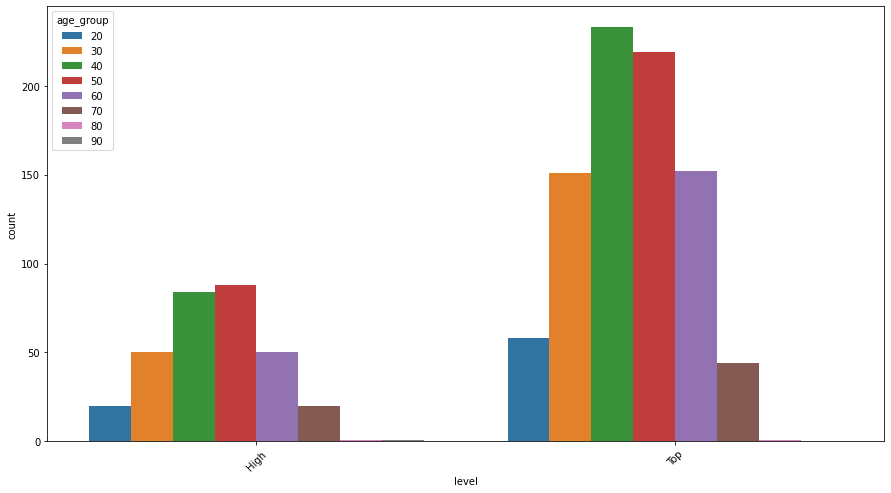

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(data=target_cus, x= 'level', hue='age_group')
plt.xticks(rotation=45);

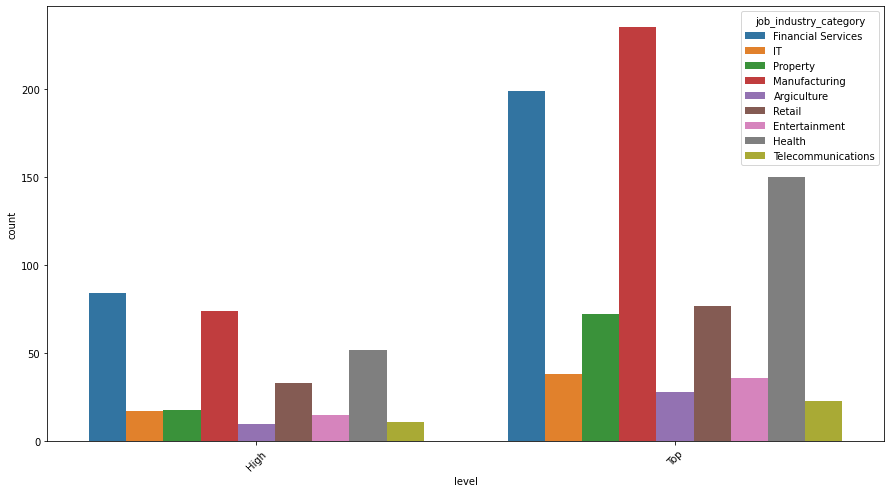

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(data=target_cus, x= 'level', hue='job_industry_category')
plt.xticks(rotation=45);

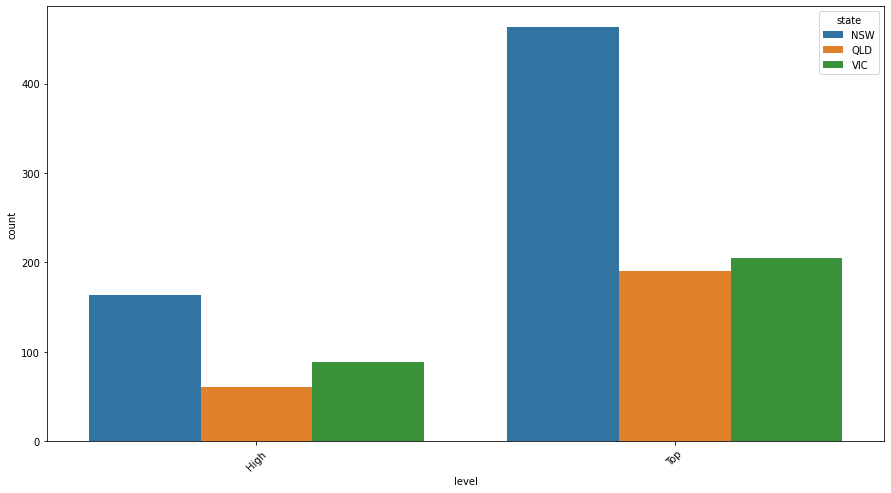

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(data=target_cus, x= 'level', hue='state')
plt.xticks(rotation=45);

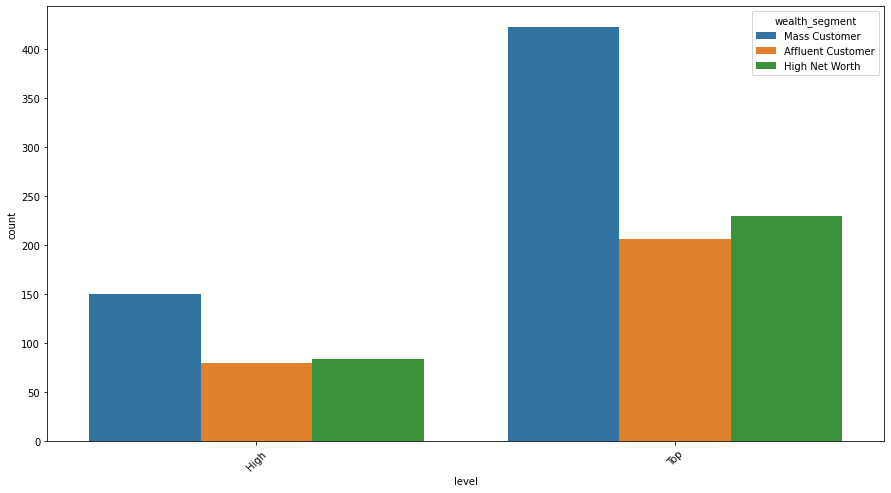

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(data=target_cus, x= 'level', hue='wealth_segment')
plt.xticks(rotation=45);


Target customer group: 

1. age_group = ['40','50']
2. state = ['NSW']
3. wealth_segment = ['Mass Customer']
4. job_industry_category = ['Financial Services','Manufacturing','Health']

In [126]:
df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)

/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_83225/3842704768.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)


In [127]:
df_newc = df_newc.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],axis=1)

In [128]:
df_newc.dropna()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [129]:
df_newc['age'] = (dt.datetime.now()-df_newc['DOB'])/np.timedelta64(1,'Y')

In [130]:
df_newc['state'].replace('New South Wales','NSW',inplace =True)
df_newc['state'].replace('Victoria','VIC',inplace =True)

In [132]:
df_newc['age_group'] = ((round(df_newc['age'] / 10)) * 10)

In [133]:
df_newc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.200673,70.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52.507736,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.072327,50.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.653345,40.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.006118,60.0


In [137]:
df_newc.age_group.value_counts()

50.0    204
60.0    180
70.0    150
30.0    149
40.0    141
80.0     95
20.0     64
Name: age_group, dtype: int64

In [150]:
sum(df_newc['age_group'] == 40.0)

141

In [151]:
sum(df_newc['age_group'] == 50.0)

204

In [156]:
df_sub = df_newc[(df_newc['age_group'] ==40.0)| (df_newc['age_group'] == 50.0) & (df_newc['state'] == 'NSW') & (df_newc['wealth_segment'] == 'Mass Customer' ) & (df_newc['job_industry_category'].isin(['Manufacturing','Financial Services','Health'])) ]

In [158]:
df_sub.nunique()

first_name                             173
last_name                              169
gender                                   2
past_3_years_bike_related_purchases     83
DOB                                    170
job_title                               99
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  20
address                                175
postcode                               146
state                                    3
country                                  1
property_valuation                      12
Rank                                   134
Value                                  134
age                                    170
age_group                                2
dtype: int64

In [159]:
df_sub.shape

(175, 20)